<a href="https://colab.research.google.com/github/sahug/ds-tensorflow-colab/blob/master/Tensorflow%20-%202D%20CNN%20CIFAC10%20Image%20Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensorflow - 2D CNN CIFAC10 Image Classifier**

**What is CNN**

A **Convolutional Neural Network (ConvNet/CNN)** is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics

**Important Terms of CNN**

- Convolutional Layer
- Activation Function
- Filter Size (Each filter extract different part of the image)
- Stride Size
- Max pooling
- Flattening and Dense LayerWhat is CNN


**Download Data and Model Building**

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
print(tf.__version__)

2.8.0


**Approach 1**

**Load Dataset**

In [67]:
import tensorflow_datasets as tfds

(ds_train, ds_test), ds_info = tfds.load("cifar10",
                                        split=["train", "test"],
                                        shuffle_files=True,
                                        # True, the returned tf.data.Dataset will have a 2-tuple structure (input, label)
                                        # False, the default, the returned tf.data.Dataset will have a dictionary with all the features.
                                        as_supervised=True,
                                        with_info=True)                                        

**Dataset Info**

In [68]:
ds_info

tfds.core.DatasetInfo(
    name='cifar10',
    full_name='cifar10/3.0.2',
    description="""
    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_path='C:\\Users\\sahug\\tensorflow_datasets\\cifar10\\3.0.2',
    download_size=162.17 MiB,
    dataset_size=132.40 MiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=50000, num_shards=1>,
    },
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning

In [69]:
# id 
print(ds_info.features["id"].shape)
print(ds_info.features["id"].dtype)

print("\n")

# image
print(ds_info.features["image"].shape)
print(ds_info.features["image"].dtype)

print("\n")

# label
print(ds_info.features["label"].shape)
print(ds_info.features["label"].dtype)
print(ds_info.features["label"].num_classes)
print(ds_info.features["label"].names)

()
<dtype: 'string'>


(32, 32, 3)
<dtype: 'uint8'>


()
<dtype: 'int64'>
10
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


**Train and Test Dataset**

In [70]:
print(list(ds_info.splits.keys()))

print("\n")

# Train DS
print(ds_info.splits["train"].num_examples)
print(ds_info.splits["train"].filenames)
print(ds_info.splits["train"].num_shards)

print("\n")

# Test DS
print(ds_info.splits["test"].num_examples)
print(ds_info.splits["test"].filenames)
print(ds_info.splits["test"].num_shards)

['train', 'test']


50000
['cifar10-train.tfrecord-00000-of-00001']
1


10000
['cifar10-test.tfrecord-00000-of-00001']
1


**Visualize**

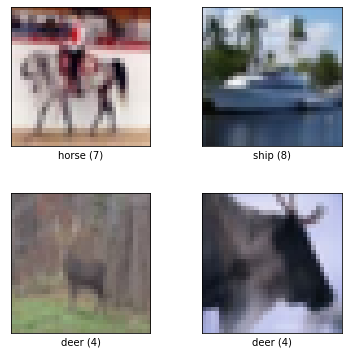

In [71]:
fig = tfds.show_examples(ds_train, ds_info, rows=2, cols=2)

**Data Pipeline**

In [72]:
AUTOTUNE = tf.data.AUTOTUNE
BATCH = 64
EPOCHS = 5

Train

In [81]:
for image_batch, labels_batch in ds_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 32, 32, 3)
(64,)


In [73]:
# This will save some operations (like file opening and data reading) from being executed during each epoch.
ds_train = ds_train.cache()

# Fills a buffer with buffer size elements, then randomly samples elements from this buffer, 
# replacing the selected elements with new elements. For perfect shuffling, 
# a buffer size greater than or equal to the full size of the dataset is required.
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)

# Pulls data in batches rather than all at once.
ds_train = ds_train.batch(BATCH)

# While the model is executing training step s, the input pipeline is reading the data for step s+1.
# AUTOTUNE will automatically decide the value. 
ds_train = ds_train.prefetch(AUTOTUNE)

Test

In [74]:
ds_test = ds_test.batch(BATCH)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(AUTOTUNE)

**Input Shape**

In [75]:
input_shape = ds_info.features['image'].shape
input_shape

(32, 32, 3)

**Model**

In [76]:
from keras import layers, activations

# Input Layer
inputs = keras.Input(shape=(input_shape))

# Normalization Layer
x = layers.Rescaling(1.0/255.0)(inputs)

# CONV2D layer.
# padding=same keeps the original data padding
x = layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation=activations.relu)(x)
x = layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation=activations.relu)(x)

# Maxpool Layer
# padding=valid tries to reduce the dimension
x = layers.MaxPool2D(pool_size=(2, 2), strides=2, padding="valid")(x)

# Dropout Layer
x = layers.Dropout(0.5)(x)

# Flatten Layer
x = layers.Flatten()(x)

# Dense Layer
x = layers.Dense(units=128, activation=activations.relu)(x)

# Output Layer
outputs = layers.Dense(units=10, activation=activations.softmax)(x)

model = keras.Model(inputs=inputs, outputs=[outputs], name="cifar10_model")

**Summary**

In [77]:
model.summary()

Model: "cifar10_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_14 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 32)        0         
                                                     

**Compile**

In [78]:
losses = keras.losses.SparseCategoricalCrossentropy(from_logits=False)
optim = keras.optimizers.Adam(lr=0.001)
metrics = [keras.metrics.SparseCategoricalAccuracy()]

model.compile(loss=losses, optimizer=optim, metrics=metrics)

c:\Users\sahug\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**Tensorboard**

In [79]:
%load_ext tensorboard
import datetime

# Clear any logs from previous runs
!del -ff ./logs/cifar10/

# Log Dir
log_dir = "logs/cifar10/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

# Callbacks
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Invalid switch - "logs".


**Train**

In [80]:
history = model.fit(ds_train,
                        epochs=EPOCHS,
                        batch_size=64, 
                        validation_data=ds_test, 
                        verbose=1, 
                        callbacks=[tensorboard_callback])

Epoch 1/5
782/782 [==============================] - 135s 170ms/step - loss: 1.4596 - sparse_categorical_accuracy: 0.4749 - val_loss: 1.2646 - val_sparse_categorical_accuracy: 0.5644
Epoch 2/5
782/782 [==============================] - 152s 194ms/step - loss: 1.1199 - sparse_categorical_accuracy: 0.6040 - val_loss: 1.0351 - val_sparse_categorical_accuracy: 0.6367
Epoch 3/5
782/782 [==============================] - 135s 172ms/step - loss: 0.9861 - sparse_categorical_accuracy: 0.6546 - val_loss: 0.9792 - val_sparse_categorical_accuracy: 0.6571
Epoch 4/5
782/782 [==============================] - 120s 153ms/step - loss: 0.8943 - sparse_categorical_accuracy: 0.6856 - val_loss: 0.8939 - val_sparse_categorical_accuracy: 0.6871
Epoch 5/5
782/782 [==============================] - 110s 141ms/step - loss: 0.8305 - sparse_categorical_accuracy: 0.7078 - val_loss: 0.8931 - val_sparse_categorical_accuracy: 0.6885


**View Tensorboard**

http://localhost:6006/

In [83]:
%tensorboard --logdir logs/fit/cifar10

**Learning Visualiization**

In [85]:
epoch_range = range(1, 6)

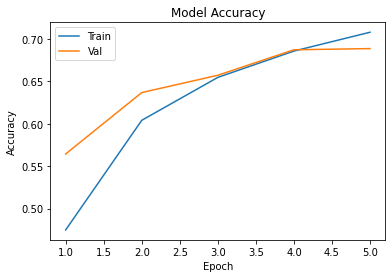

In [86]:
# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(epoch_range, history.history["sparse_categorical_accuracy"])
plt.plot(epoch_range, history.history["val_sparse_categorical_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

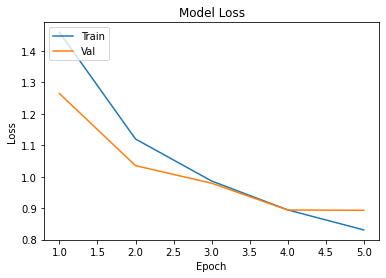

In [87]:
# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(epoch_range, history.history["loss"])
plt.plot(epoch_range, history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

**Approach 2**

In [ ]:
from keras.datasets import cifar10
from keras import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

classes_name = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

# Since Neural Network understand the data between **0 to 1**. Brininging our data in the range **0 to 1**. 
# To do this we will simply divide the given data with the maximum value.
x_train = x_train/x_train.max()
x_test = x_test/x_train.max()

x_train.shape, x_test.shape

# x_train gives (50000, 32, 32, 3) - 50000 data, 32 x 32 bits, height and width, 3 is rgb, color.
# x_test gives (10000, 32, 32, 3) - 10000 data, 32 x 32 bits, height and width, 3 is rgb, color.

plt.imshow(x_test[0].astype("uint8")) 

model = Sequential()

# Only first layer needs input size
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu", input_shape=[32, 32, 3])) # Same keeps the original data padding

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2, 2), strides=2, padding="valid")) # Valid tries to reduce the dimension

# Dropout helps to avid the overfitting of the mode. Here we are dropping 50% of the input at this layer.
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(units=128, activation="relu"))

# Output layer. Unit is the size of the different output. Here we have 10 different outcomes.
model.add(Dense(units=10, activation="softmax"))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])

history = model.fit(x_train, y_train, batch_size=10, epochs=10, verbose=1, validation_data=(x_test, y_test))

# In the above training we can see the validation accuracy is lesser than the accuracy. 
# This means our model is **overfitting**. Also, if the validation accuracy is higher than the accuracy its 
# called **underfitting**. So lets look at the point where it started overfillting by plotting the graph.

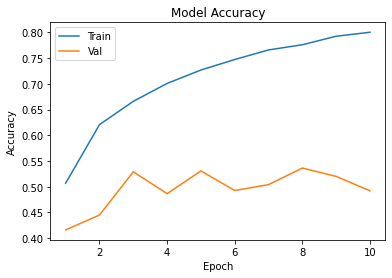

In [32]:
# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
epoch_range = range(1, 11) # No of Epochs used to train. 11 - 1 = 10
plt.plot(epoch_range, history.history["sparse_categorical_accuracy"])
plt.plot(epoch_range, history.history["val_sparse_categorical_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()



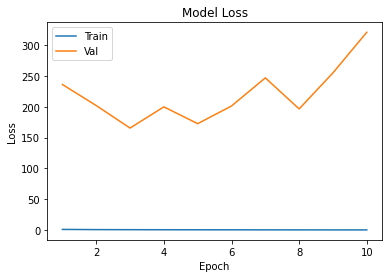

In [33]:
# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(epoch_range, history.history["loss"])
plt.plot(epoch_range, history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()